<img src='https://github.com/LinkedEarth/Logos/blob/master/Pyleoclim/PYLEOCLIM_logo_HORZ-01.png?raw=true' width="800">

# Pyleoclim figures with multiple panels

## Authors

by [Julien Emile-Geay](https://orcid.org/0000-0001-5920-4751)

## Preamble

### Goal(s) 
Most `plot()` commands in `pyleoclim` are designed to be on their own within a notebook cell for exploratory purposes. However, it may sometimes be desirable to combine such plots into a larger figure. This notebook shows how to do that. 

**Reading Time: 5 min**

### Keywords
Visualization, Customization 

### Pre-requisites
This tutorial assumes basic knowledge of Python, particularly Matplotlib. If you are not familiar with it, check out [this tutorial](http://linked.earth/ec_workshops_py/module5). 

### Relevant Packages
pyleoclim, matplotlib

## Demonstration

We start by loading a few of our favorite packages and creating 2 incompletely sampled series:

In [1]:
%load_ext watermark

import numpy as np
import pyleoclim as pyleo
import matplotlib.pyplot as plt

In [2]:
ns = 2 ; nt = 500; n_del = int(0.1*nt)
serieslist = []

for j in range(ns):
    t, v = pyleo.utils.gen_ts(nt= nt, model = 'colored_noise',alpha = 1) # generate fractal noise
    deleted_idx = np.random.choice(range(np.size(t)), n_del, replace=False)
    tu =  np.delete(t, deleted_idx)
    vu =  np.delete(v, deleted_idx)
    ts = pyleo.Series(time = tu, value = vu, label = 'series ' + str(j+1))
    serieslist.append(ts)

Time axis values sorted in ascending order
Time axis values sorted in ascending order


/var/folders/xj/p7h9764x7cx0by8547l04rrr0000gn/T/ipykernel_11888/2486238019.py:9: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True, which might modify your supplied time metadata.  Please set to False if you want a different behavior.
  ts = pyleo.Series(time = tu, value = vu, label = 'series ' + str(j+1))
/var/folders/xj/p7h9764x7cx0by8547l04rrr0000gn/T/ipykernel_11888/2486238019.py:9: UserWarning: No time_unit parameter provided. Assuming years CE.
  ts = pyleo.Series(time = tu, value = vu, label = 'series ' + str(j+1))
/var/folders/xj/p7h9764x7cx0by8547l04rrr0000gn/T/ipykernel_11888/2486238019.py:9: UserWarning: No time_name parameter provided. Assuming "Time".
  ts = pyleo.Series(time = tu, value = vu, label = 'series ' + str(j+1))


We then place them into a [`MultipleSeries` object](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#multipleseries-pyleoclim-multipleseries) and plot them:

(<Figure size 640x480 with 3 Axes>,
 {0: <Axes: ylabel='value'>,
  1: <Axes: ylabel='value'>,
  'x_axis': <Axes: xlabel='Time [years CE]'>})

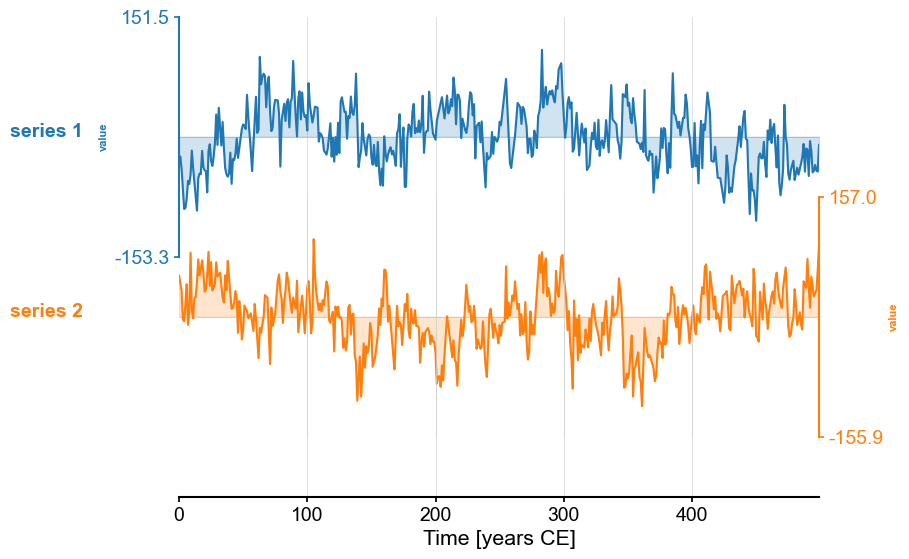

In [3]:
ms = pyleo.MultipleSeries(serieslist)
ms.stackplot()

Now, we might want to align those two series to perform some comparison (e.g. correlation). The function [`common_time()`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.multipleseries.MultipleSeries.common_time) is very useful for this purpose, and it can invoke 3 different methods: interpolation, binning, and a Gaussian kernel. Say we want to compare how these three methods perform. An obvious way is to apply the functions and plot the result one by one:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Gaussian kernel ($h=3$)'}, xlabel='Time [years CE]', ylabel='value'>)

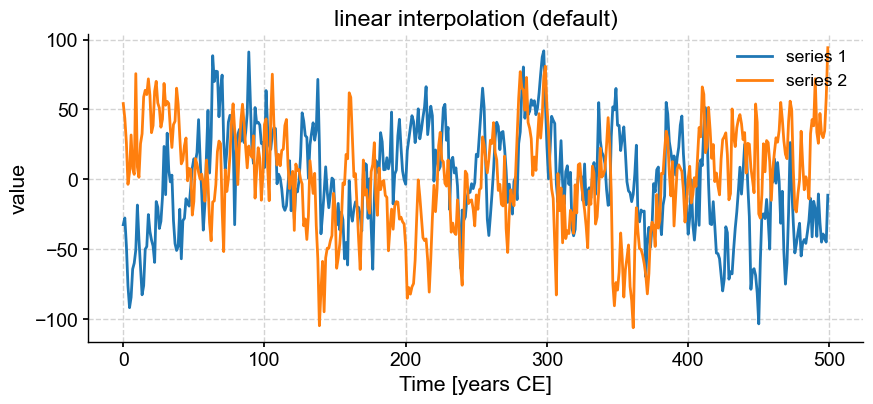

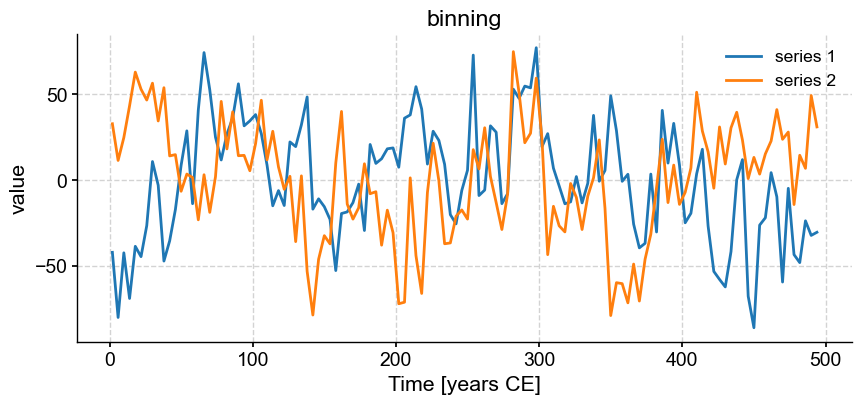

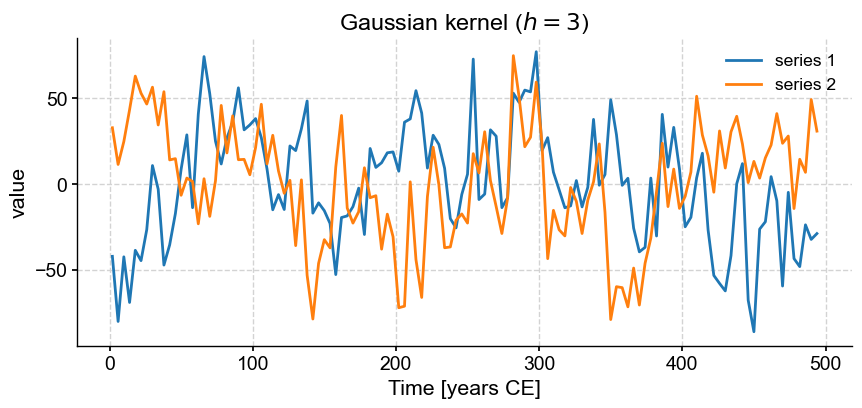

In [4]:
ms.common_time().plot(title='linear interpolation (default)')
ms.common_time(method='bin').plot(title='binning')
ms.common_time(method='gkernel').plot(title=r'Gaussian kernel ($h=3$)')

These are really 3 different figures stacked on top of each other. The result is relatively pleasant because they have the same default size, but say we wanted it to pack them into a 2 x 2 grid and add a fourth example where we tweaked the bandwidth of the Gaussian kernel. 

To do this, we can leverage Matplotlib's [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) and create a figure and axes object (here called `axs`):

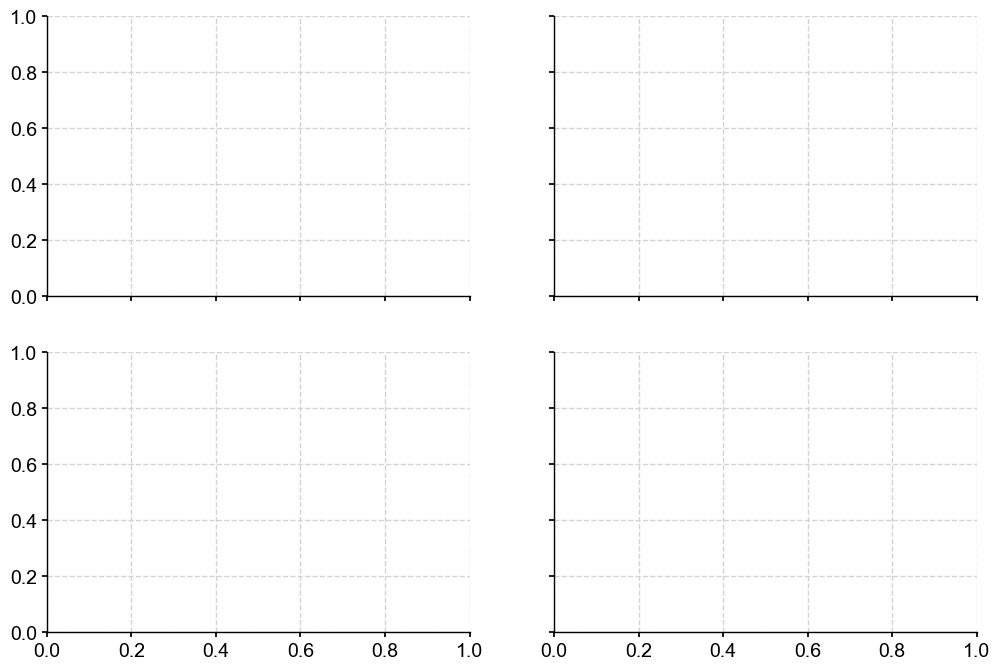

In [5]:
fig, axs = plt.subplots(2,2,sharex=True,sharey=True, figsize=(12,8))
axs = axs.flatten() # this command turns the 2x2 array of axes into a 1D array, which is easier for indexing

Now all we have to do is assign each of the panels (0, 1 ,2 ,3) with a plot, using the `ax` parameter of the `plot()` function. By default, a new Axes object is created when the function is invoked, but if this parameter is specified, the figure is drawn into the specified Axes object. So all you have to do is pass  `ax=axs[i-1]` for the $i^{th}$ plot:

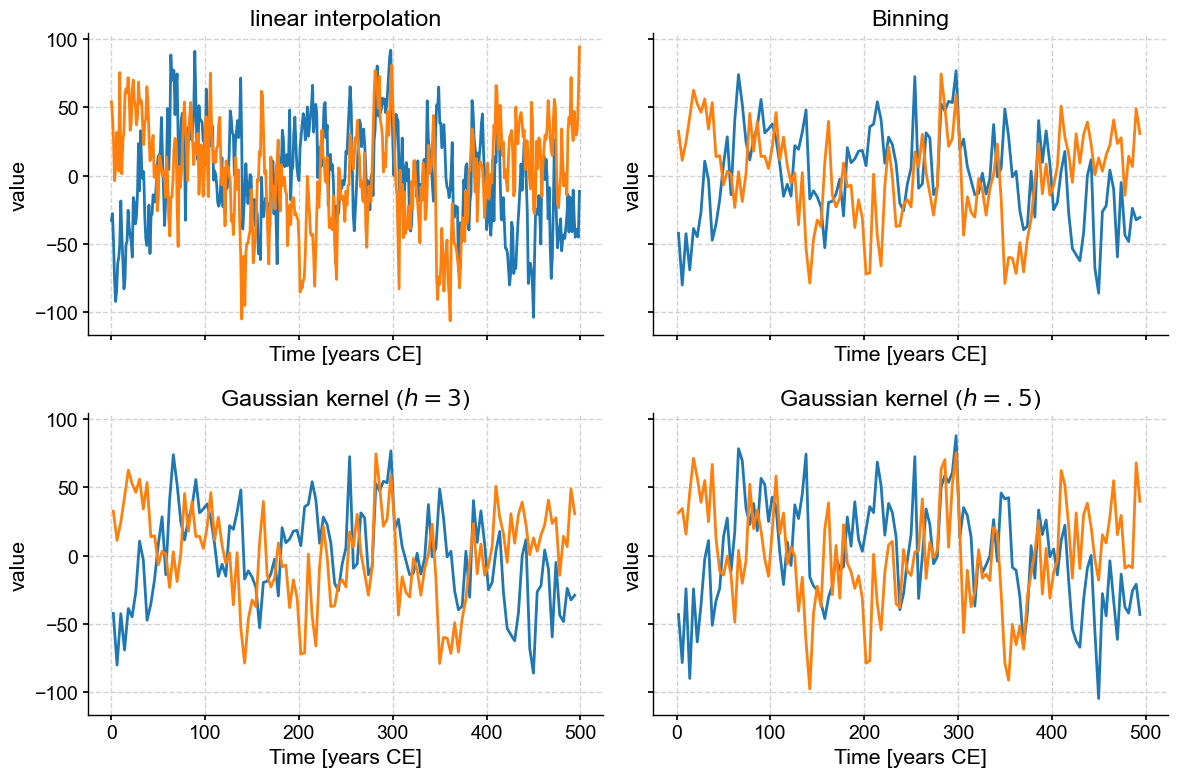

In [6]:
from IPython.display import display
# apply common_time with default parameters
msc = ms.common_time()
msc.plot(title='linear interpolation',ax=axs[0], legend=False)

# apply common_time with binning
msc = ms.common_time(method='bin')
msc.plot(title='Binning',ax=axs[1], legend=False)

# apply common_time with gkernel
msc = ms.common_time(method='gkernel')
msc.plot(title=r'Gaussian kernel ($h=3$)',ax=axs[2],legend=False)

# apply common_time with gkernel and a large bandwidth
msc = ms.common_time(method='gkernel', h=.5)
msc.plot(title=r'Gaussian kernel ($h=.5$)',ax=axs[3],legend=False)
fig.tight_layout()
display(fig)

Note also that we deactivated the legend with `legend=False` so as not to overburden the figure with redundant information.

Of course, it would have been easier to do this all in one fellswoop:

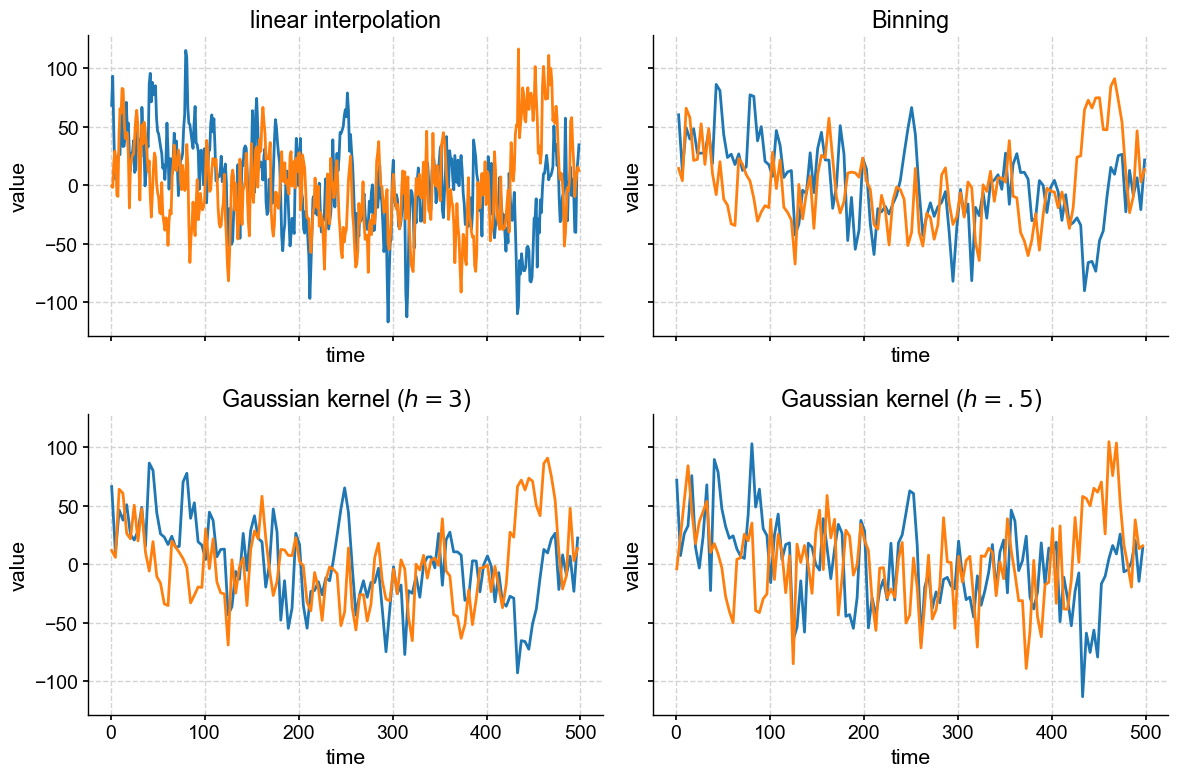

In [11]:
fig, axs = plt.subplots(2,2,sharex=True,sharey=True, figsize=(12,8))
axs = axs.flatten()
msc = ms.common_time()
msc.plot(title='linear interpolation',ax=axs[0], legend=False)
msc = ms.common_time(method='bin')
msc.plot(title='Binning',ax=axs[1], legend=False)
msc = ms.common_time(method='gkernel')
msc.plot(title=r'Gaussian kernel ($h=3$)',ax=axs[2],legend=False)
msc = ms.common_time(method='gkernel', h=.5)
msc.plot(title=r'Gaussian kernel ($h=.5$)',ax=axs[3],legend=False)
fig.tight_layout()

Finally, note that we set `sharex = True` and `sharey = True`, which tells `subplots()` that your plots will be sharing x and y axes, so only the left-most and bottom axes bear tick labels. This is a nice way to remove [chart junk](http://becomingvisual.com/portfolio/chartjunk/). We could go further and silence some of the labels, too:

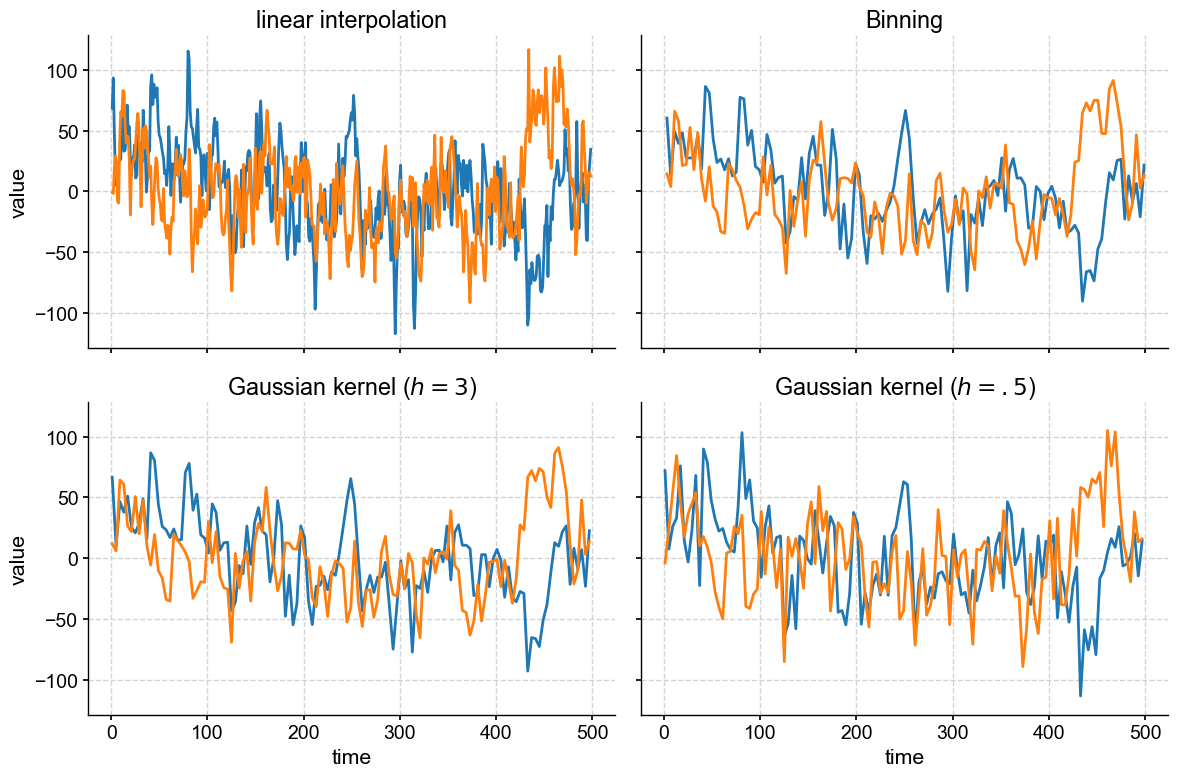

In [12]:
fig, axs = plt.subplots(2,2,sharex=True,sharey=True, figsize=(12,8))
axs = axs.flatten()
msc = ms.common_time()
msc.plot(title='linear interpolation',ax=axs[0], legend=False, xlabel='')
msc = ms.common_time(method='bin')
msc.plot(title='Binning',ax=axs[1], legend=False, xlabel='', ylabel='')
msc = ms.common_time(method='gkernel')
msc.plot(title=r'Gaussian kernel ($h=3$)',ax=axs[2],legend=False)
msc = ms.common_time(method='gkernel', h=.5)
msc.plot(title=r'Gaussian kernel ($h=.5$)',ax=axs[3],legend=False, ylabel='')
fig.tight_layout()

If you wanted uneven panel sizes, then you would have to learn about [GridSpec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html#matplotlib.gridspec.GridSpec), which is very powerful but has a steeper learning curve. In fact, if you've played with [summary_plot()](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.series.Series.summary_plot), or a [dashboard](https://pyleoclim-util.readthedocs.io/en/master/core/api.html#pyleoclim.core.coherence.Coherence.dashboard), you have seen GridSpec in action already. 

Finally, let's redo this plot with a different plot [style](https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-style-sheets):

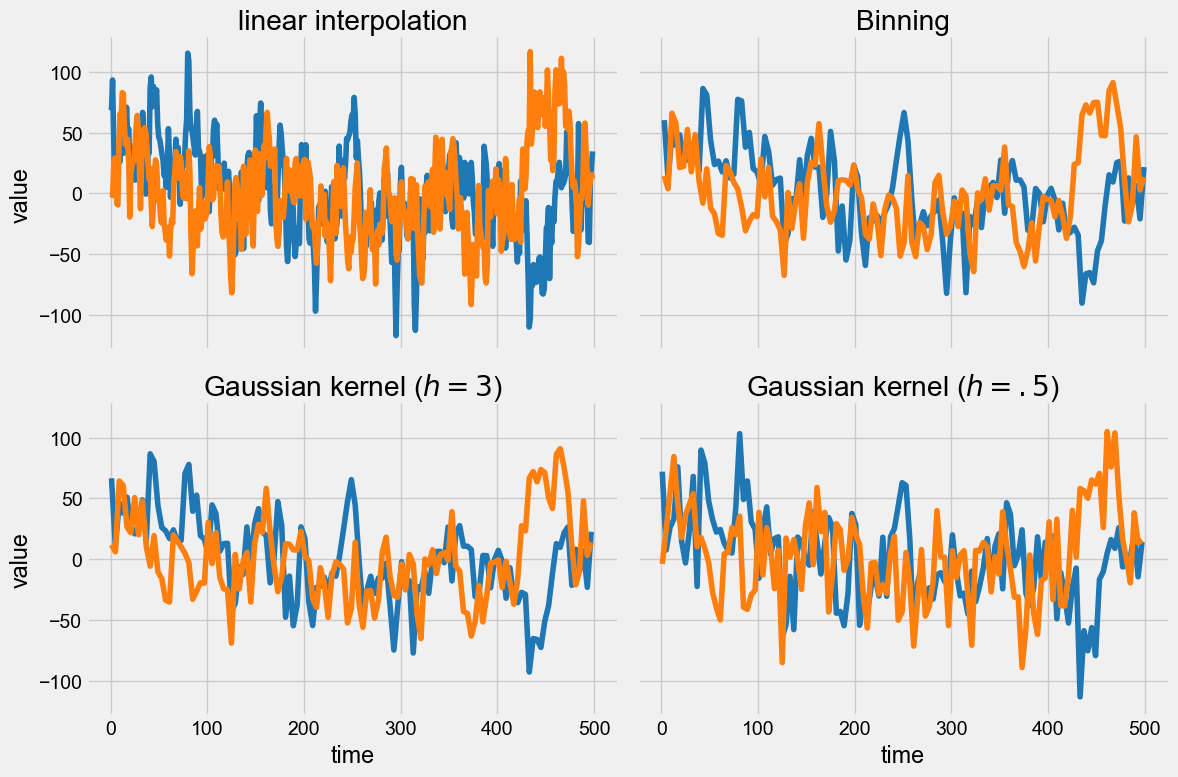

In [13]:
with plt.style.context('fivethirtyeight'):
    fig, axs = plt.subplots(2,2,sharex=True,sharey=True, figsize=(12,8))
    axs = axs.flatten()
    msc = ms.common_time()
    msc.plot(title='linear interpolation',ax=axs[0], legend=False, xlabel='')
    msc = ms.common_time(method='bin')
    msc.plot(title='Binning',ax=axs[1], legend=False, xlabel='', ylabel='')
    msc = ms.common_time(method='gkernel')
    msc.plot(title=r'Gaussian kernel ($h=3$)',ax=axs[2],legend=False)
    msc = ms.common_time(method='gkernel', h=.5)
    msc.plot(title=r'Gaussian kernel ($h=.5$)',ax=axs[3],legend=False, ylabel='')
    fig.tight_layout()

Actually, `pyleoclim` has its own predefined [styles](https://pyleoclim-util.readthedocs.io/en/master/_modules/pyleoclim/utils/plotting.html#set_style) as well, to tailor figures to web view (like this notebook) or journal articles, for instance. Styles are a very handy way to customize many features of a plot at once, without having to manually tinker with them. You can define your own, too!

## Takeways
- `pyleoclim`'s plotting engine is built atop Matplotlib. If you want to customize plots, you need to learn a bit about Matplotlib
-  many of `pyleoclim`'s plots can be placed into existing Matplotlib [Axes objects](https://matplotlib.org/stable/api/axes_api.html). This enables complex figures with multiple panels. 
- `pyleoclim`'s plots can be easily customized with style sheets.

In [7]:
%watermark -n -u -v -iv -w

Last updated: Mon Mar 04 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.20.0

matplotlib: 3.8.2
numpy     : 1.26.3
pyleoclim : 0.13.1b0

Watermark: 2.4.3

